# Linear Regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# define global parameters (sample size,etc.)
(n,sigma,mean,low,high) = (200, 3, 0, 0, 20)
x = np.random.uniform(low = low, high = high, size = n).reshape(-1,1)
# add ones as a first column
x = np.hstack([np.ones_like(x),x])
# gaussian noise
noise = np.random.normal(mean, sigma, x.shape[0])

# generating dataset 

In [26]:
# real value of params
params = np.array([3,2])
y = x.dot(params) + noise

# scatter plot

Text(0.5, 0, 'x')

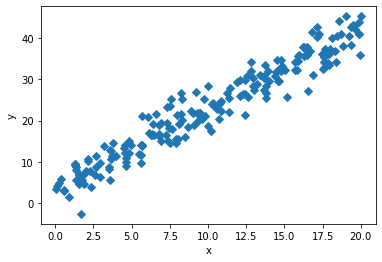

In [27]:
plt.plot(x[:,1],y,'D')
plt.ylabel('y')
plt.xlabel('x')

### shuffle data and define test/train split

In [28]:
data = np.hstack([x,y.reshape(len(y),1)])
np.random.shuffle(data)
# 80/20
split_ind = int(np.floor((n*8)/10))
train,test = data[:split_ind],data[split_ind:]
(x_train,y_train) = (train[:,:x.shape[1]],train[:,-1])
(x_test,y_test) = (test[:,:x.shape[1]],test[:,-1])

## hypothesis h and gradient descent

In [29]:
def h(x,theta):
    return x.dot(theta)

In [30]:
# metrics
def mean_squared_error(predicted_value,true_value):
    return (1/len(predicted_value))*np.sum((predicted_value - true_value)**2)

In [31]:
def gradient_descent(rate,data,label,iter=1000):
    # initialise theta with zeros
    theta = np.zeros(data.shape[1],)
    m = data.shape[0]
    # main part of optimization
    for _ in range(iter):
        # current prediction (theta from the previos step)
        current_pred = h(data,theta)
        # updating weights
        theta -= (rate/m)*(data.T.dot((current_pred - label)))
    return theta

# Train model

In [32]:
alpha = 0.01
iter = 2000
theta = gradient_descent(alpha,x_train,y_train,iter)
print(theta)

[3.35242671 1.95180113]


## regression line train

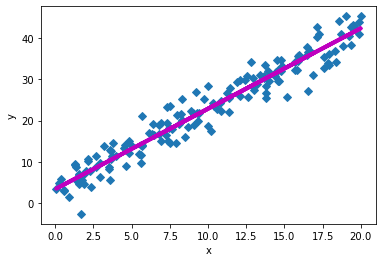

In [33]:
plt.plot(x_train[:,x.shape[1]-1],y_train,'D')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x_train[:,x.shape[1]-1],  np.dot(x_train,theta),'m',linewidth=4)

### accuracy

In [34]:
pred = h(x_train,theta)
print(mean_squared_error(pred,y_train))

8.137995255281494


# testing model on x_test, y_test

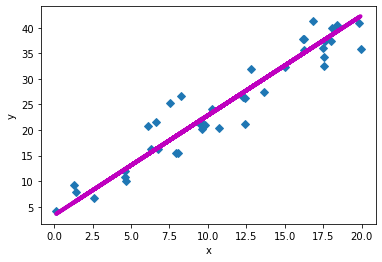

In [35]:
plt.plot(x_test[:,x.shape[1]-1],y_test,'D')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x_test[:,x.shape[1]-1],  np.dot(x_test,theta),'m',linewidth=4)

In [36]:
pred_test = h(x_test,theta)
print(mean_squared_error(pred_test,y_test))

10.646012326189876
